<a href="https://colab.research.google.com/github/Kirungu1/Kirungu1/blob/main/04_irises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Simple implementation of iris recognition based on Domain-specific Human-inspired Binarized Statistical Image Features (DHBSIF), peer-reviewed and published [here](https://ieeexplore.ieee.org/document/8658238).  

Language: Python 3  

Needed libraries:
* NumPy (https://numpy.org/)
* matplotlib (https://matplotlib.org/)
* OpenCV (https://opencv.org/)
* SciPy (https://scipy.org/)

## Needed libraries and files

In [ ]:
# download of iris files for proper tests
!pip install gdown
!gdown 18czPqnf4cqxIPEXo0Mz1xi5IPHEWaGMR
!gdown 1AzZCeFEIPYLKCelNLvickiI2qWjJ12Eg
!gdown 1rsQNGzHRdBXMj0Ebt6irRRFA6cuPke4h
!gdown 1rSUP6ADFuaIr_XxAh72qtvsieKSqOwS2

In [ ]:
# download of domain-specific human-inspired BSIF filters
!gdown 1IrcAXVCVd_3hBOyQN0rFyxMK6uH0MN73

In [10]:
# imported libraries
import numpy as np
print('NumPy version', np.__version__)

import matplotlib as plt
print('Matplotlib version', plt.__version__)

import cv2
print('OpenCV version', cv2.__version__)

import scipy
print('SciPy version', scipy.__version__)

NumPy version 1.26.4
Matplotlib version 3.7.1
OpenCV version 4.10.0
SciPy version 1.13.1


--------------------------
## Iris acquisition

### Main function

In [38]:
# Acquires an iris from an image file, given its path.
# Parameters:
# <file_path> - The path to the image file containing the iris.
# <view> - True if the loaded image must be shown, False otherwise.
# Returns the obtained image as a numpy 2D uint8 array.
def acquire_from_file(file_path, view=False):
    # reads the image from the given file path
    # and returns it
    iris = cv2.imread(file_path)

    # shows the read image, if it is the case
    if view:
        plt.pyplot.imshow(cv2.cvtColor(iris, cv2.COLOR_BGR2RGB))
        plt.pyplot.title('Iris acquisition')
        plt.pyplot.show()

    return iris

In [39]:
# tests the iris acquisition
iris_1 = acquire_from_file('/content/eye_011.png', view=True)
print('Image resolution:', iris_1.shape, '\n')

iris_2 = acquire_from_file('/content/eye_012.png', view=True)
print('Image resolution:', iris_2.shape)

AttributeError: module 'matplotlib.pyplot' has no attribute 'pyplot'

--------------------------
## Iris enhancement

### Main steps
* <code>_01_preprocess</code>: to preprocess the given image, resizing and bringing it to grayscale.
* <code>_02_detect_pupil</code>: to detect the pupil circle.
* <code>_03_detect_limbus</code>: to detect the limbus circle.
* <code>_04_compute_mask</code>: to mask the iris in and filter everything else out.
* <code>_05_normalize_iris</code>: to normalize the iris content into a rectangle.

In [16]:
# Preprocesses the given <iris> image (numpy 2D array with uint8 pixel values).
# Provide <view> as True if you want to see the result of computations.
# Returns the preprocessed iris as a numpy 2D uint8 array.
def _01_preprocess(iris, iris_width=640, view=False):
    # makes the iris grayscale, if it has color information
    if len(iris.shape) > 2 and iris.shape[2] > 1:  # more than one channel?
        iris = cv2.cvtColor(iris, cv2.COLOR_BGR2GRAY)

    # resizes the iris to present a width of <iris_width> pixels,
    # keeping the original aspect ratio
    aspect_ratio = float(iris.shape[0]) / iris.shape[1]
    height = int(round(iris_width * aspect_ratio))
    iris = cv2.resize(iris, (iris_width, height))

    # shows the obtained iris, if it is the case
    if view:
        plt.pyplot.imshow(iris, cmap='gray')
        plt.pyplot.title('Iris preprocessing')
        plt.pyplot.show()

    return iris

In [18]:
# tests the iris pre-processing
pp_iris_1 = _01_preprocess(iris_1, view=True)
print('Image resolution:', pp_iris_1.shape, '\n')

pp_iris_2 = _01_preprocess(iris_2, view=True)
print('Image resolution:', pp_iris_2.shape, '\n')

NameError: name 'iris_1' is not defined

In [20]:
# Detects the pupil over the given <iris> leveraging the OpenCV
# implementation of blob detection; the pupil is a blob.
# Provide <view> as True if you want to see the result of computation.
# Returns the pupil circle (x_center, y_center, radius), in pixels.
# Returns None if no pupil is found.
def _02_detect_pupil(iris, iris_blur_size=31, iris_min_rad=20, view=False):
  # sharpens the iris texture and min-max normalizes it in the [0,255] interval
  blur_iris = cv2.medianBlur(iris, iris_blur_size)
  blur_iris = iris - blur_iris

  if view:
    plt.pyplot.imshow(blur_iris, cmap='gray')
    plt.pyplot.title('Sharp iris')
    plt.pyplot.show()

  # blob detection with OpenCV
  blob_detection = cv2.SimpleBlobDetector_Params()
  blob_detection.filterByArea = True
  blob_detection.minArea = int(np.pi * iris_min_rad ** 2)
  blob_detection.maxArea = int(np.pi * (iris_min_rad * 4) ** 2)
  blob_detector = cv2.SimpleBlobDetector_create(blob_detection)
  blobs = blob_detector.detect(blur_iris)

  # takes the pupil as the largest blob
  pupil = None
  ref_size = 0

  for blob in blobs:
    if blob.size > ref_size:
      pupil = (int(blob.pt[0]), int(blob.pt[1]), int(blob.size / 2))
      ref_size = blob.size

  # shows the obtained pupil, if it is the case
  if view:
    iris_copy = cv2.cvtColor(iris, cv2.COLOR_GRAY2BGR)

    if pupil is not None:
      cv2.circle(iris_copy, pupil[0:2], pupil[2], (0, 255, 0), 1)

    plt.pyplot.imshow(cv2.cvtColor(iris_copy, cv2.COLOR_BGR2RGB))
    plt.pyplot.title('Pupil on iris')
    plt.pyplot.show()

  # returns the obtained pupil
  return pupil

In [21]:
# tests the pupil detection
pupil_1 = _02_detect_pupil(pp_iris_1, view=True)
print('\n')

pupil_2 = _02_detect_pupil(pp_iris_2, view=True)

NameError: name 'pp_iris_1' is not defined

In [22]:
# Detects the limbus over the given <iris>, by finding the limbus circle
# with the best fit to the Laplacian of Gaussian of the iris.
# Provide <view> as True if you want to see the result of computations.
# Returns the limbus circle (x_center, y_center, radius), in pixels.
# Returns None if no limbus is found.
def _03_detect_limbus(iris, pupil,
                      blur_size=3, limbus_offset_ratio=3.0,
                      limbus_min_pupil_ratio = 1.4,
                      limbus_max_pupil_ratio = 4.4,
                      view=False):
  # computes the LoG of the given iris
  gauss_iris = cv2.GaussianBlur(iris, (blur_size, blur_size), 0)
  log_iris = (cv2.Laplacian(gauss_iris, cv2.CV_32F, None, blur_size) > 0).astype(np.uint8)

  if view:
    plt.pyplot.imshow(log_iris, cmap='gray')
    plt.pyplot.title('LoG iris')
    plt.pyplot.show()

  # finds the best fitting circle to the LoG iris
  best_limbus_pos = None
  best_limbus_sum = 0.0
  best_limbus_rad = 0

  limbus_offset = int(pupil[2] / limbus_offset_ratio)
  for limbus_radius in range(int(pupil[2] * limbus_min_pupil_ratio),
                             int(pupil[2] * limbus_max_pupil_ratio), 2):
    for x in range(pupil[0] - limbus_offset, pupil[0] + limbus_offset, 2):
      for y in range(pupil[1] - limbus_offset, pupil[1] + limbus_offset, 2):
        limbus_mask_i = np.zeros(iris.shape, np.uint8)
        cv2.circle(limbus_mask_i, (x, y), limbus_radius, (255, 255, 255), 1)

        limbus_sum = np.sum(cv2.bitwise_and(log_iris, log_iris, mask=limbus_mask_i)).astype(np.float32) / (2 * np.pi * (limbus_radius))
        if limbus_sum > best_limbus_sum or (limbus_sum == best_limbus_sum and limbus_radius > best_limbus_rad):
          best_limbus_pos = (x, y)
          best_limbus_sum = limbus_sum
          best_limbus_rad = limbus_radius

  # sets the obtained limbus
  limbus = None
  if best_limbus_pos is not None:
    limbus = (best_limbus_pos[0], best_limbus_pos[1], best_limbus_rad)

  # shows the obtained limbus=, if it is the case
  if view:
    iris_copy = cv2.cvtColor(iris, cv2.COLOR_GRAY2BGR)

    if limbus is not None:
      cv2.circle(iris_copy, limbus[0:2], limbus[2], (0, 255, 0), 1)

    plt.pyplot.imshow(cv2.cvtColor(iris_copy, cv2.COLOR_BGR2RGB))
    plt.pyplot.title('Limbus on iris')
    plt.pyplot.show()

  # returns the obtained limbus
  return limbus

In [23]:
# tests the limbus detection
limbus_1 = _03_detect_limbus(pp_iris_1, pupil_1, view=True)
print('\n')

limbus_2 = _03_detect_limbus(pp_iris_2, pupil_2, view=True)

NameError: name 'pp_iris_1' is not defined

In [24]:
# Computes a mask to remove eye lashes and specular highlights from the given <iris>.
# This process needs the <pupil> and <limbus> circles to execute the proper segmentation.
# Provide <view> as True if you want to see the result of computations.
# Returns the computed mask as a numpy 2D uint8 array, which is black (zero) for the areas to be ignored, and
# white (255) for the ones to be processed.
def _04_compute_mask(iris, pupil, limbus,
                     eyelash_value=25, spec_value=254,
                     view=False):
    # computed mask
    mask = np.zeros(iris.shape, np.uint8)

    # adds limbus and pupil regions to the mask
    cv2.circle(mask, limbus[0:2], limbus[2], (255, 255, 255), -1)
    cv2.circle(mask, pupil[0:2], pupil[2], (0, 0, 0), -1)

    # removes eventual eye lashes (black) and specular highlights (white)
    eq_iris = cv2.bitwise_and(iris, iris, mask=mask)
    eq_iris = cv2.equalizeHist(eq_iris)
    eq_iris = cv2.normalize(eq_iris, None, 0, 255, cv2.NORM_MINMAX)
    _, m_lashes = cv2.threshold(eq_iris, eyelash_value, 255, cv2.THRESH_BINARY)
    _, m_specul = cv2.threshold(eq_iris, spec_value, 255, cv2.THRESH_BINARY_INV)

    # final mask
    mask = cv2.bitwise_and(m_lashes, m_specul, mask=mask)

    # shows the obtained mask, if it is the case
    if view:
        mask_iris = cv2.bitwise_and(iris, iris, mask=mask)
        plt.pyplot.imshow(mask_iris, cmap='gray')
        plt.pyplot.title('Masked iris')
        plt.pyplot.show()

    return mask

In [ ]:
# tests iris masking
mask_1 = _04_compute_mask(pp_iris_1, pupil_1, limbus_1, view=True)
print('\n')

mask_2 = _04_compute_mask(pp_iris_2, pupil_2, limbus_2, view=True)

In [25]:
# Normalizes the given <iris> making it a proper rectangle (rubber sheet algorithm).
# This process needs the <pupil> and <limbus> circles, as well as the iris useful content <mask>
# to execute the proper normalization.
# Provide <view> as True if you want to see the result of computations.
# Returns the normalized iris and respective normalized mask as numpy 2D uint8 arrays.
def _05_normalize_iris(iris, pupil, limbus, mask,
                       norm_iris_width=512, norm_iris_height=64,
                       norm_iris_sector_count=1000,
                       view=False):
    # iris band width
    iris_band_width = limbus[2] - pupil[2]

    # output normalized iris
    norm_iris = np.zeros((iris_band_width, norm_iris_sector_count), np.uint8)
    norm_mask = np.zeros((iris_band_width, norm_iris_sector_count), np.uint8)

    # for each sector...
    j = 0
    for angle in np.arange(0, 2.0 * np.pi, 2.0 * np.pi / norm_iris_sector_count):
        # for each iris band pixel...
        for i in range(iris_band_width):
            # cartesian position
            x = int(round(pupil[0] + (pupil[2] + i + 1) * np.sin(angle)))
            y = int(round(pupil[1] + (pupil[2] + i + 1) * np.cos(angle)))

            # pixel-value transference
            norm_iris[i, j] = iris[y, x]
            norm_mask[i, j] = mask[y, x]

        # next sector
        j = j + 1

    # resizes the normalized iris and mask
    norm_iris = cv2.resize(norm_iris, (norm_iris_width, norm_iris_height),
                           interpolation=cv2.INTER_CUBIC)
    norm_iris = cv2.equalizeHist(norm_iris)

    norm_mask = cv2.resize(norm_mask, (norm_iris_width, norm_iris_height),
                           interpolation=cv2.INTER_CUBIC)
    _, norm_mask = cv2.threshold(norm_mask, 0, 255, cv2.THRESH_BINARY)

    if view:
      norm_view = np.vstack((norm_iris, norm_mask))
      plt.pyplot.imshow(norm_view, cmap='gray')
      plt.pyplot.title('Normalized iris')
      plt.pyplot.show()

    # returns the obtained normalized iris and mask
    return norm_iris, norm_mask

In [ ]:
# tests iris normalization
norm_iris_1, norm_mask_1 = _05_normalize_iris(pp_iris_1, pupil_1, limbus_1, mask_1, view=True)
print('\n')

norm_iris_2, norm_mask_2 = _05_normalize_iris(pp_iris_2, pupil_2, limbus_2, mask_2, view=True)

### Main function

In [26]:
# Enhances the given <iris> image (numpy 2-D array with uint8 pixel values).
# Provide <view> as True if you want to see the results of computations.
# Returns the normalized iris and respective normalized mask as numpy 2D uint8 arrays.
def enhance(iris, view=False):
    # pre-processes the iris
    pp_iris = _01_preprocess(iris, view=view)

    # detects the pupil
    pupil = _02_detect_pupil(pp_iris)
    if pupil is None:
        return None

    # detects the limbus
    limbus = _03_detect_limbus(pp_iris, pupil)
    if limbus is None:
        return None

    # shows pupil and limbus, if this is the case
    if view:
      view_pupil_limbus = cv2.cvtColor(pp_iris, cv2.COLOR_GRAY2BGR)
      cv2.circle(view_pupil_limbus, pupil[0:2], pupil[2], (0, 255, 0), 1)
      cv2.circle(view_pupil_limbus, limbus[0:2], limbus[2], (0, 0, 255), 1)

      plt.pyplot.imshow(cv2.cvtColor(view_pupil_limbus, cv2.COLOR_BGR2RGB))
      plt.pyplot.title('Pupil and limbus')
      plt.pyplot.show()

    # computes the mask that will remove the noise from the iris texture
    mask = _04_compute_mask(pp_iris, pupil, limbus, view=view)

    # computes the normalized iris
    norm_iris, norm_mask = _05_normalize_iris(pp_iris, pupil, limbus, mask, view=view)

    return norm_iris, norm_mask

In [ ]:
# tests the enhancement function
iris_1 = acquire_from_file('/content/eye_011.png')
iris_2 = acquire_from_file('/content/eye_012.png')

norm_iris_1, mask_iris_1 = enhance(iris_1, view=True)
print('\n')

norm_iris_2, mask_iris_2 = enhance(iris_2, view=True)

--------------------------
## Iris description



### Main function

In [27]:
# Describes the given normalized iris <norm_iris> with BSIF filters.
# Provide <view> as True if you want to see the results of computations.
# Returns the obtained binary descriptions.
def describe(norm_iris,
             filter_file_path='/content/ICAtextureFilters_15x15_7bit.mat',
             view=False):
    # BSIF filters learned from the eye-tracking data
    filters = scipy.io.loadmat(filter_file_path)['ICAtextureFilters']
    filter_count = filters.shape[2]
    filter_size = filters.shape[0]

    # output binary code
    descriptions = np.zeros((norm_iris.shape[0], norm_iris.shape[1], filter_count))

    # prepares the iris image to be convolved with the BSIF filters
    offset = int(filter_size / 2)
    iris_wrap = np.zeros((offset*2 + norm_iris.shape[0], offset*2 + norm_iris.shape[1]))

    iris_wrap[offset:-offset, offset:-offset] = norm_iris
    iris_wrap[offset:-offset, :offset] = norm_iris[:, -offset:]
    iris_wrap[offset:-offset, -offset:] = norm_iris[:, :offset]
    iris_wrap[offset-1:0:-1, :] = iris_wrap[offset:(offset*2)-1, :]
    iris_wrap[-offset:, :] = iris_wrap[-offset-1:(-offset*2)-1:-1, :]

    if view:
      plt.pyplot.imshow(iris_wrap, cmap='gray')
      plt.pyplot.title('Iris wrap')
      plt.pyplot.show()

    # for each filter, applies the convolution with the iris image
    for i in range(filter_count):
        conv = scipy.signal.convolve2d(iris_wrap, np.rot90(filters[:, :, filter_count - i - 1], 2), mode='valid')
        descriptions[:, :, i] = conv > 0.0  # binarization

        # shows the current convolved image, if it is the case
        if view:
            view_conv = cv2.normalize(conv, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX).astype(np.uint8)
            plt.pyplot.imshow(cv2.cvtColor(view_conv, cv2.COLOR_BGR2RGB))
            plt.pyplot.title('Filtered iris ' + str(i + 1))
            plt.pyplot.show()

            view_code = descriptions[:, :, i].astype(np.uint8) * 255
            plt.pyplot.imshow(cv2.cvtColor(view_code, cv2.COLOR_BGR2RGB))
            plt.pyplot.title('Iris code ' + str(i + 1))
            plt.pyplot.show()

    return descriptions

In [29]:
# tests the description function
iris_1 = acquire_from_file('/content/eye_011.png')
iris_2 = acquire_from_file('/content/eye_012.png')

norm_iris_1, mask_iris_1 = enhance(iris_1)
norm_iris_2, mask_iris_2 = enhance(iris_2)

desc_1 = describe(norm_iris_1, view=True)
print('Description:', desc_1.shape, '\n')

desc_2 = describe(norm_iris_2, view=True)
print('Description:', desc_2.shape)

AttributeError: 'NoneType' object has no attribute 'shape'

-----------------------
## Iris matching

### Auxiliary functions
* <code>_rotate_norm_image</code>: to rotate the binary code to cope with eventual head tilt during iris capture.
* <code>_compute_norm_hamming_distance</code>: to compute the distance between two given iris descriptions.

In [30]:
# Shifts the given iris binary code <image> according to the given <rotation>,
# in pixels. Returns the rotated code.
def _rotate_norm_image(image, rotation):
    output = np.zeros(image.shape, image.dtype)

    if rotation == 0:
        return image

    else:
        output[:, rotation:] = image[:, :-rotation]
        output[:, :rotation] = image[:, -rotation:]

    return output

In [31]:
# Computes the hamming distance between the given iris binary codes <description_1> and <description_2>,
# observing their respective masks <mask_1> and <mask_2>.
# Returns the normalized iris code distance as a positive real value.
def _compute_norm_hamming_distance(description_1, mask_1, description2, mask_2):
    # combines both masks
    comb_mask = cv2.bitwise_and(mask_1, mask_2)

    # computes the number of bits up within the resulting mask
    bit_up_count = np.sum(comb_mask > 0)

    # hamming distance
    xor_output = cv2.bitwise_xor(description_1, description2)
    xor_output = cv2.bitwise_and(xor_output, xor_output, mask=comb_mask)
    dist = np.sum(xor_output > 0)

    # returns the normalized hamming distance
    return float(dist) / bit_up_count

### Main function

In [32]:
# Matches the given iris binary codes <description_1> and <description_2>,
# observing their respective masks <mask_1> and <mask_2>.
# Returns the distance between the given iris codes, coping with possible head tilts and consequent iris rotations
# during acquisition. The distance is a positive real number.
def match(descriptions_1, mask_1, descriptions_2, mask_2, rotations=16):
    # holds the distances computed for each rotation
    rot_distances = []

    # for each rotation...
    for rotation in range(-rotations, rotations + 1):
        # holds the BSIF-filter-wise pairwise description distances
        distances = []

        # for each BSIF-filter-wise description
        for i in range(descriptions_1.shape[2]):  # could be "for i in range(descriptions_2.shape[2]):"
            # rotates description 2 and compares to 1
            desc_1 = descriptions_1[:, :, i]
            rot_desc_2 = _rotate_norm_image(descriptions_2[:, :, i], rotation)
            rot_mask_2 = _rotate_norm_image(mask_2, rotation)

            # computes and stores the current distance
            distances.append(_compute_norm_hamming_distance(desc_1, mask_1, rot_desc_2, rot_mask_2))

        # takes the resulting rotation distance as the average
        rot_distances.append(np.mean(distances))

    # returns the final distance as the minimum one (best rotation match)
    return np.min(rot_distances)

In [33]:
# tests the matching function
iris_1 = acquire_from_file('/content/eye_011.png')
iris_2 = acquire_from_file('/content/eye_012.png')

norm_iris_1, mask_iris_1 = enhance(iris_1)
norm_iris_2, mask_iris_2 = enhance(iris_2)

desc_1 = describe(norm_iris_1)
desc_2 = describe(norm_iris_2)

distance = match(desc_1, mask_iris_1, desc_2, mask_iris_2)
print('Distance:', distance)

AttributeError: 'NoneType' object has no attribute 'shape'

---
## Exercise
Compute the distances for all the possible iris pairs:
1. <code>/content/eye_011.png</code> versus <code>/content/eye_012.png</code>
2. <code>/content/eye_011.png</code> versus <code>/content/eye_021.png</code>
3. <code>/content/eye_011.png</code> versus <code>/content/eye_022.png</code>
4. <code>/content/eye_012.png</code> versus <code>/content/eye_021.png</code>
5. <code>/content/eye_012.png</code> versus <code>/content/eye_022.png</code>
6. <code>/content/eye_021.png</code> versus <code>/content/eye_022.png</code>

Do the distance values make sense?

Error: Could not acquire image from /content/eye_011.png
Error: Could not acquire image from /content/eye_012.png
Error: Could not acquire image from /content/eye_021.png
Error: Could not acquire image from /content/eye_022.png
Error: Could not process one or both irises for comparison.
Error: Could not process one or both irises for comparison.
Error: Could not process one or both irises for comparison.
Error: Could not process one or both irises for comparison.
Error: Could not process one or both irises for comparison.
Error: Could not process one or both irises for comparison.


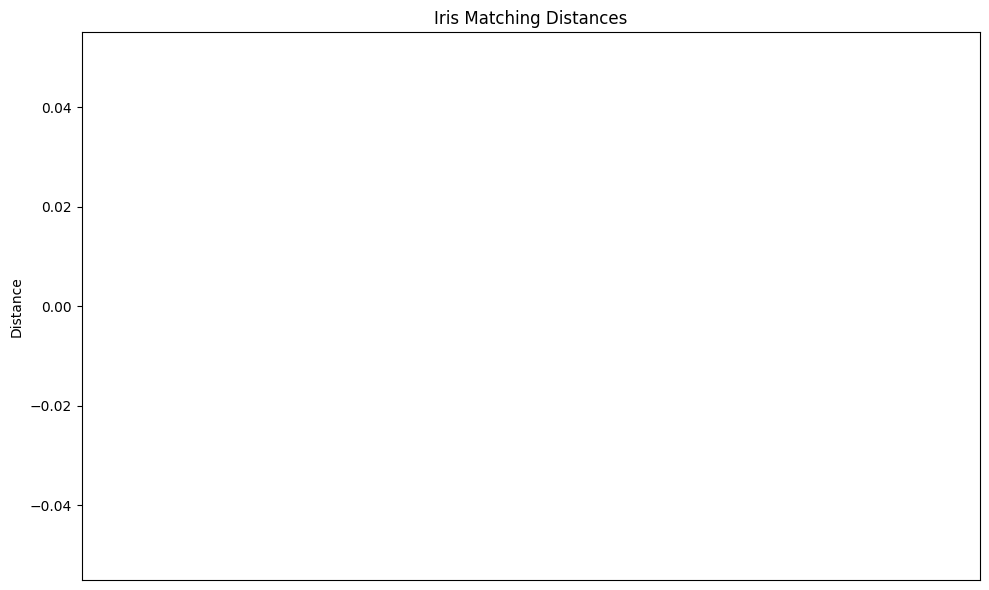

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def process_iris(file_path):
    iris = acquire_from_file(file_path)
    # Check if acquire_from_file returns a valid image
    if iris is None:
        print(f"Error: Could not acquire image from {file_path}")
        return None, None # Return None for both values if image acquisition fails
    norm_iris, mask_iris = enhance(iris)
    desc = describe(norm_iris)
    return desc, mask_iris

def compute_distances(file_paths):
    processed_irises = [process_iris(path) for path in file_paths]
    distances = {}

    for i in range(len(file_paths)):
        for j in range(i+1, len(file_paths)):
            desc1, mask1 = processed_irises[i]
            desc2, mask2 = processed_irises[j]
            # Check if both irises were processed successfully
            if desc1 is None or desc2 is None:
                print(f"Error: Could not process one or both irises for comparison.")
                continue # Skip to the next iteration if processing failed
            distance = match(desc1, mask1, desc2, mask2)
            pair = (file_paths[i], file_paths[j])
            distances[pair] = distance

    return distances

iris_files = [
    '/content/eye_011.png',
    '/content/eye_012.png',
    '/content/eye_021.png',
    '/content/eye_022.png'
]

all_distances = compute_distances(iris_files)

for pair, distance in all_distances.items():
    print(f"Distance between {pair[0]} and {pair[1]}: {distance}")

plt.figure(figsize=(10, 6))
plt.bar(range(len(all_distances)), list(all_distances.values()), align='center')
plt.xticks(range(len(all_distances)), [f"{p[0][-7:-4]} vs {p[1][-7:-4]}" for p in all_distances.keys()], rotation=45)
plt.ylabel('Distance')
plt.title('Iris Matching Distances')
plt.tight_layout()
plt.show()